In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')


# Setup
Vamos a retomar el dataset de países que usamos en la clase de binarización.

In [2]:
# Cargamos el dataset desde el link
paises = pd.read_table('https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv')
paises.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Vamos a quedarnos solo con la ultima observación registrada para cada país.
paises_last_record = paises.groupby('country').agg({'year': 'max'}).reset_index()
paises_last_record = pd.merge(left = paises_last_record, right = paises, on = ['country', 'year'], how = 'left')
paises_last_record.head()

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,2007,Asia,43.828,31889923,974.580338
1,Albania,2007,Europe,76.423,3600523,5937.029526
2,Algeria,2007,Africa,72.301,33333216,6223.367465
3,Angola,2007,Africa,42.731,12420476,4797.231267
4,Argentina,2007,Americas,75.320,40301927,12779.379640


# 1. Histograma

## 1.1 Pandas
Vamos a utilizar los histogramas para analizar la distribución de las variables del dataset.

Primero vamos a usar la función de **Numpy** para analizar los bines que tendrá nuestro histograma.

In [4]:
hist, bin_edges = np.histogram(paises_last_record['lifeExp'], bins=10)
hist

array([ 8,  7, 10, 10, 10,  8,  5, 33, 23, 28], dtype=int64)

In [5]:
bin_edges

array([39.613, 43.912, 48.211, 52.51 , 56.809, 61.108, 65.407, 69.706,
       74.005, 78.304, 82.603])



Lo que nos está devolciendo esta función corresponde a:

*    **hist** contiene la frecuencia o el número de elementos correspondientes a cada bin.
*    **bin_edges** contiene los bordes o límites del bin.


Para el análisis gráfico, primero vamos a ver la función más sencilla, incluida dentro del paquete de **Pandas**.

<Axes: ylabel='Frequency'>

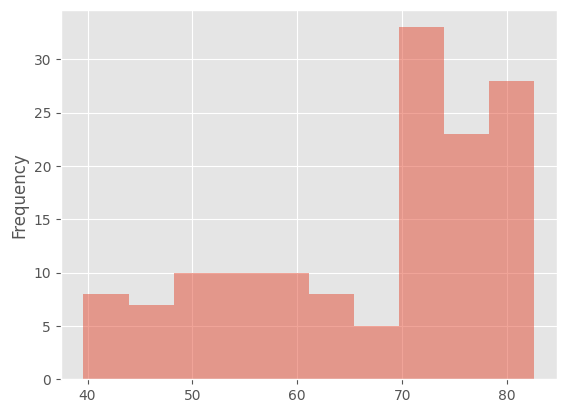

In [6]:
paises_last_record['lifeExp'].plot.hist(bins=10, alpha=0.5)


Veamos como cambia la distribución cuando cambiamos la cantidad de bines.

<Axes: ylabel='Frequency'>

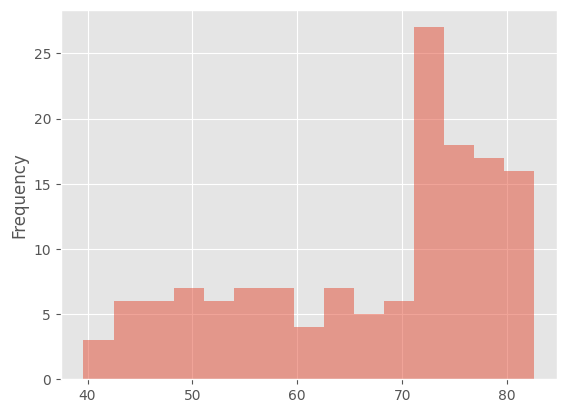

In [7]:
paises_last_record['lifeExp'].plot.hist(bins=15, alpha=0.5)

<Axes: ylabel='Frequency'>

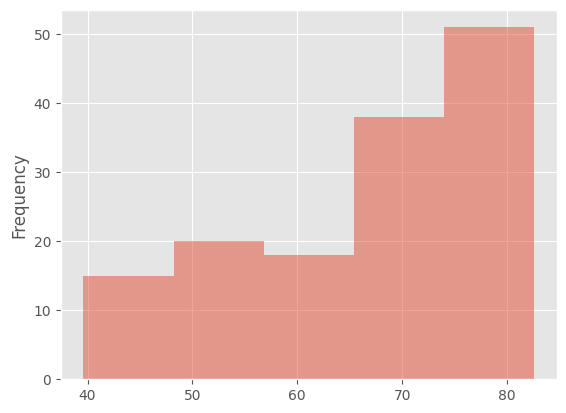

In [8]:
paises_last_record['lifeExp'].plot.hist(bins=5, alpha=0.5)

## 1.2 Seaborn
Vamos a ver ahora la función del paquete de **[Seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html)** que cuenta con varias funcionalidades adicionales.

<Axes: xlabel='lifeExp', ylabel='Count'>

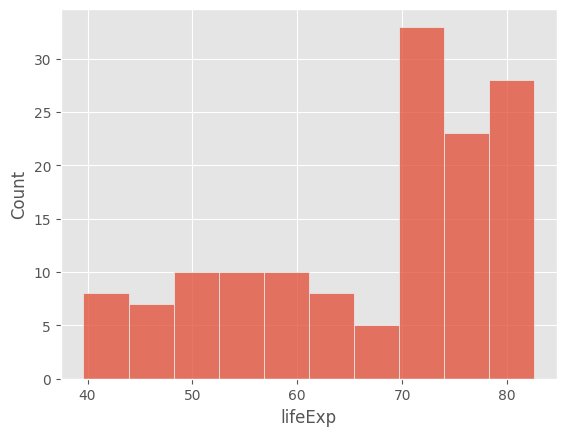

In [9]:
sns.histplot(data=paises_last_record, x="lifeExp", bins = 10)

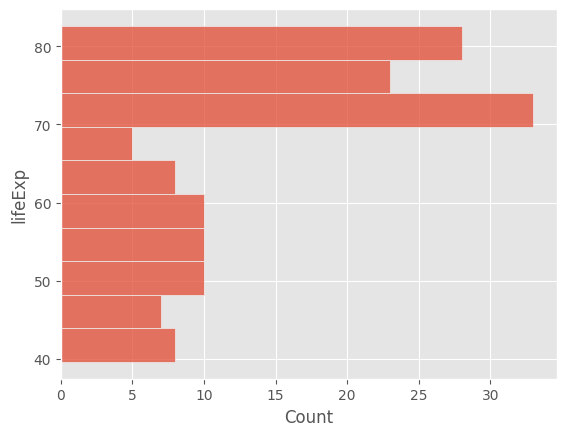

In [10]:
# Puede verse en horizontal
sns.histplot(data=paises_last_record, y="lifeExp", bins = 10)
!pip show sns

<Axes: xlabel='lifeExp', ylabel='Count'>

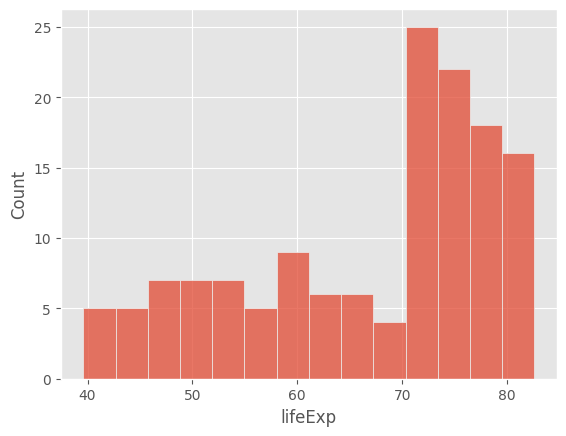

In [11]:
# También se le puede especificar el ancho que queremos que tengan nuestros bines en vez de la cantidad de bines
sns.histplot(data=paises_last_record, x="lifeExp", binwidth=3)

<Axes: xlabel='lifeExp', ylabel='Count'>

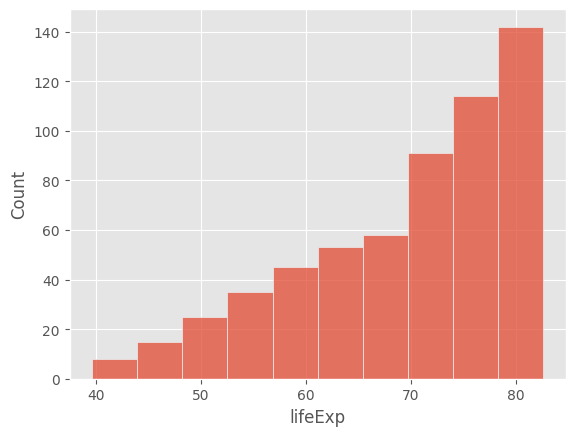

In [12]:
# Podemos ver la frecuencia cumulada
sns.histplot(data=paises_last_record, x="lifeExp", bins = 10, cumulative=True)

<Axes: xlabel='lifeExp', ylabel='Count'>

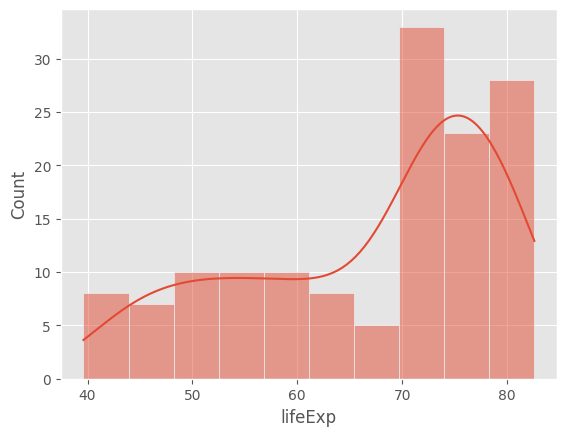

In [13]:
# Podemos graficar una linea de tendencia
sns.histplot(data=paises_last_record, x="lifeExp", bins = 10, kde=True)

<Axes: xlabel='lifeExp', ylabel='Count'>

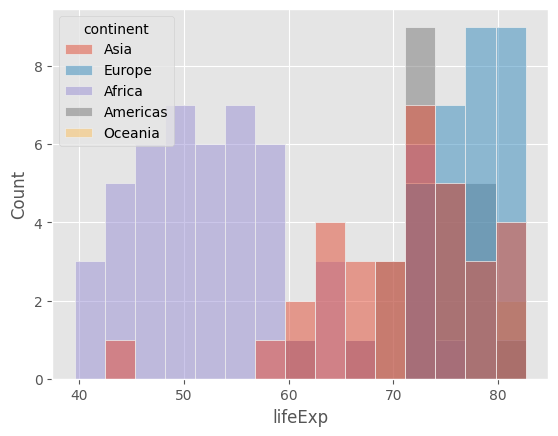

In [14]:
# Podemos graficar por separado los distintos continentes en simultaneo
sns.histplot(data=paises_last_record, x="lifeExp", bins = 15, hue='continent')

<Axes: xlabel='lifeExp', ylabel='Count'>

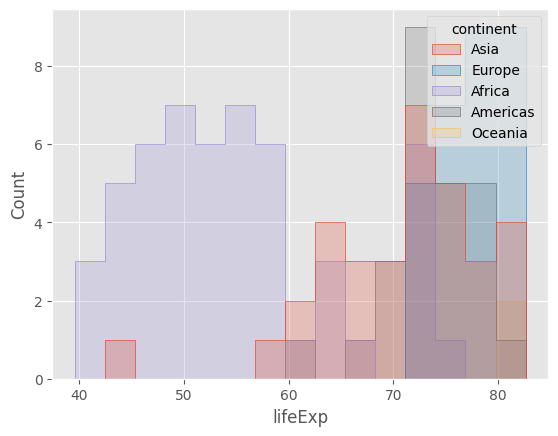

In [15]:
# Podemos graficar por separado los distintos continentes y ver su distribucion acumulada en simultano
sns.histplot(data=paises_last_record, x="lifeExp", bins = 15, hue='continent', element="step")

<Axes: xlabel='lifeExp', ylabel='Count'>

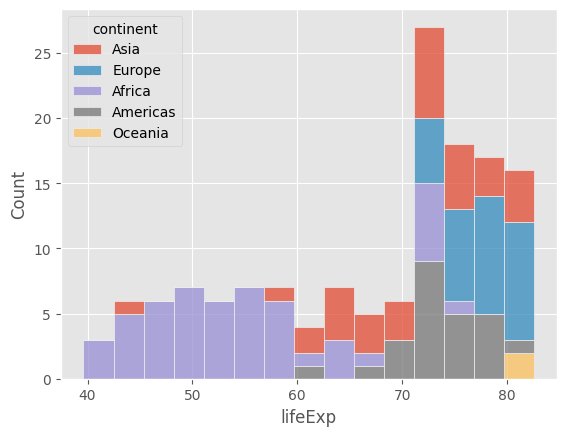

In [16]:
# Podemos graficar por separado los distintos continentes y ver su distribucion acumulada
sns.histplot(data=paises_last_record, x="lifeExp", bins = 15, hue='continent', multiple="stack")

# 2. Gráfico de barras

Imaginemos ahora que queremos analizar algunas métricas de resumen de nuestro dataset.

In [17]:
df_group = paises_last_record.groupby('continent').agg({'lifeExp': 'mean',
                                                        'pop': 'mean',
                                                        'gdpPercap': 'mean'}).reset_index()
df_group.head()

,continent,lifeExp,pop,gdpPercap
0,Africa,54.806038,1.787576e+07,3089.032605
1,Americas,73.608120,3.595485e+07,11003.031625
2,Asia,70.728485,1.155138e+08,12473.026870
3,Europe,77.648600,1.953662e+07,25054.481636
4,Oceania,80.719500,1.227497e+07,29810.188275


## 2.1 Pandas
Haremos primero un breve análisis gráfico con **[Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**.

<Axes: xlabel='continent'>

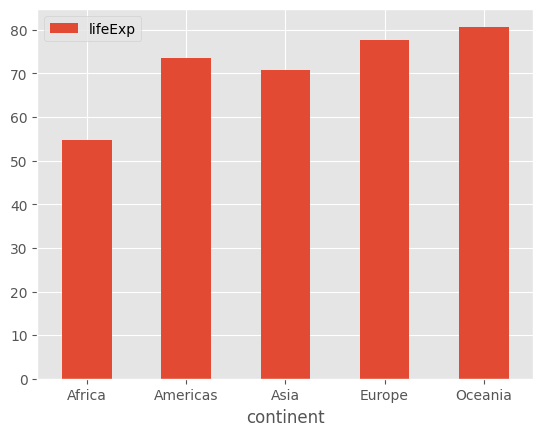

In [18]:
df_group.plot.bar(x='continent', y='lifeExp', rot=0)

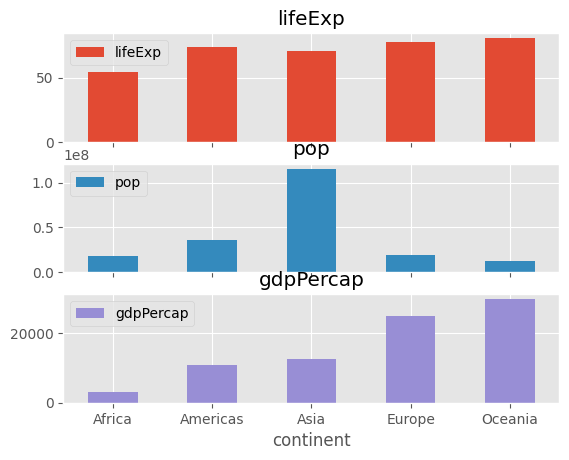

In [19]:
# Asi podemos ver la distribución de todas las variables
axes = df_group.plot.bar(x='continent', rot=0, subplots=True)
axes[1].legend(loc=2) 

## 2.2 Seaborn
Veamos ahora las funcionalidades de **[Seaborn](https://)**.

<Axes: xlabel='continent', ylabel='lifeExp'>

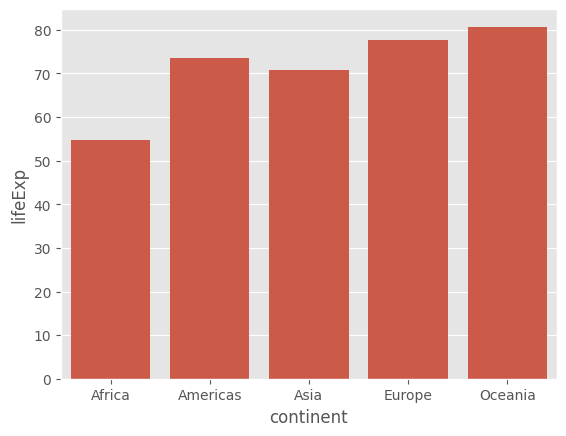

In [20]:
 sns.barplot(x="continent", y="lifeExp", data=df_group)

<Axes: xlabel='year', ylabel='lifeExp'>

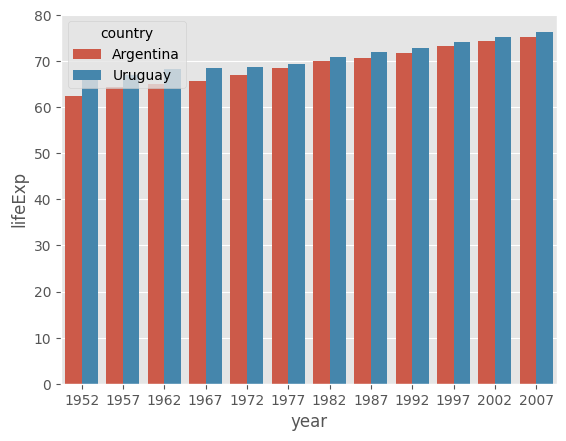

In [21]:
# podemos también comparar valores
subset = paises[(paises.country == 'Argentina') | (paises.country == 'Uruguay')]

sns.barplot(x="year", y="lifeExp", hue="country", data=subset)

# 3. Scatter Plot

Vamos a usar los gráficos de dispersión para analizar como se relaciona la esperanza de vida con el PBI per cápita.

## 3.1 Pandas

Vamos a empezar usando la función de **[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)**.

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

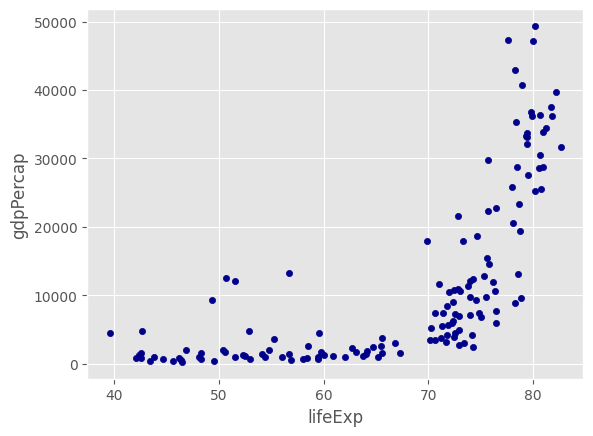

In [22]:
paises_last_record.plot.scatter(x='lifeExp', y='gdpPercap', c='DarkBlue')

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

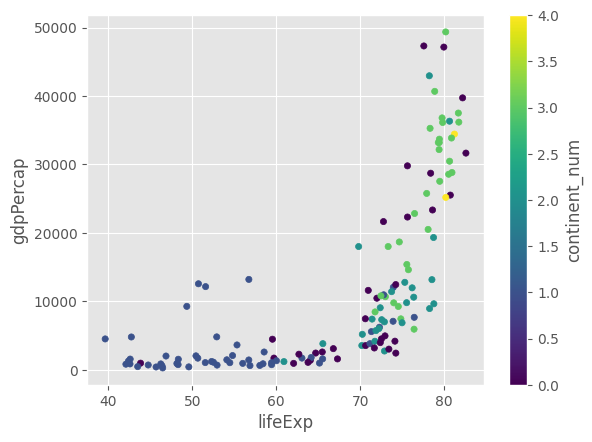

In [23]:
# Podemos colorear por continente, pero solo va a soportar variables numericas
paises_last_record['continent_num'] = np.where(paises_last_record.continent == 'Asia', 0, 
                                               np.where(paises_last_record.continent == 'Africa', 1, 
                                                        np.where(paises_last_record.continent == 'Americas', 2, 
                                                                 np.where(paises_last_record.continent == 'Europe', 3, 4))))


paises_last_record.plot.scatter(x='lifeExp', y='gdpPercap', c='continent_num', colormap='viridis')

## 3.2 Seaborn
Veamos ahora que funcionalidades tiene **[Seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)**

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

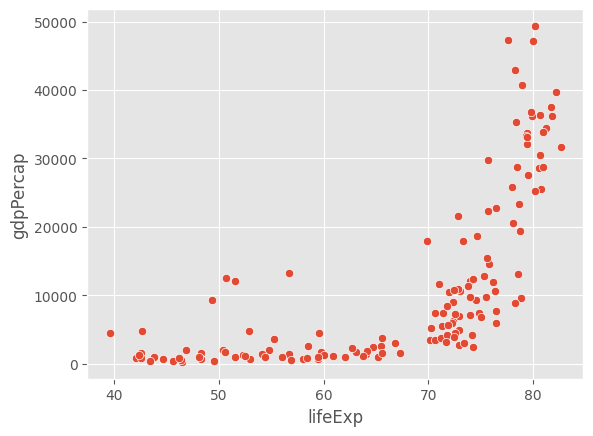

In [24]:
sns.scatterplot(data=paises_last_record, x="lifeExp", y="gdpPercap")

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

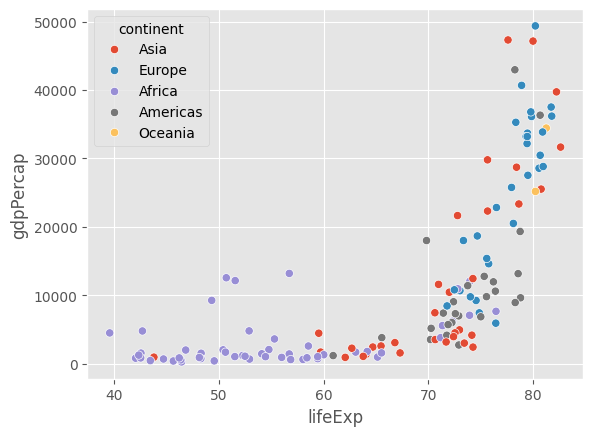

In [25]:
# Ahora vamos a colorear por continente. Va a aceptar variables no numericas
sns.scatterplot(data=paises_last_record, x="lifeExp", y="gdpPercap", hue='continent')

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

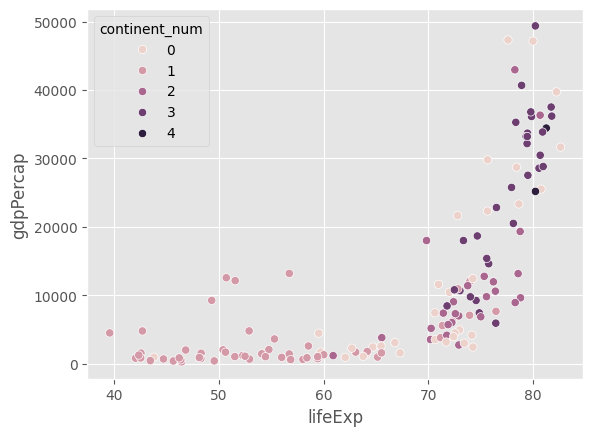

In [26]:
# Pero si le damos una variable numerica, va a usar un degrade de colores
sns.scatterplot(data=paises_last_record, x="lifeExp", y="gdpPercap", hue='continent_num')

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

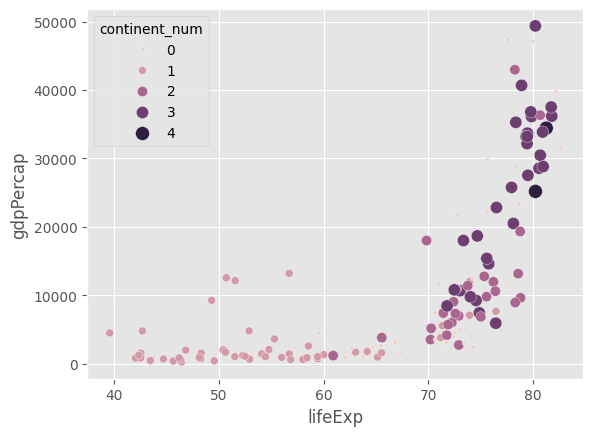

In [27]:
# Y podemos modificar el tamaño de los puntos
sns.scatterplot(data=paises_last_record, x="lifeExp", y="gdpPercap", hue='continent_num', size='continent_num', sizes=(10, 100))

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

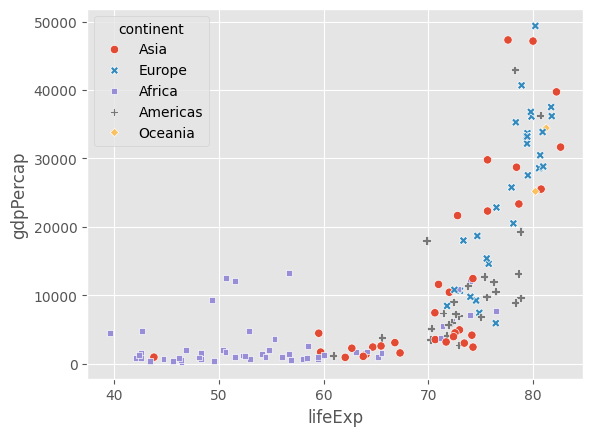

In [28]:
# Tambien modificando el tipo de marcador
sns.scatterplot(data=paises_last_record, x="lifeExp", y="gdpPercap", hue='continent', style = 'continent')

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

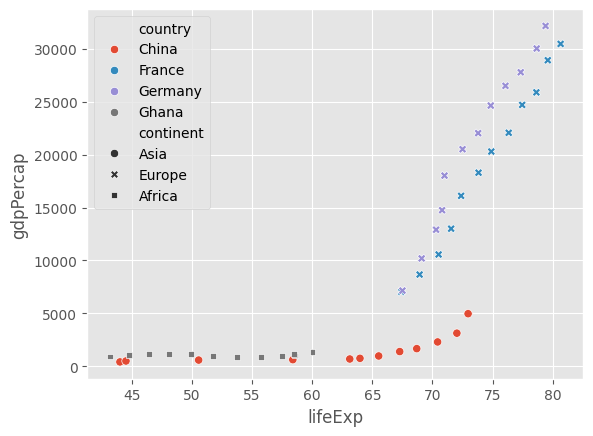

In [29]:
# Podemos agregar una tercera dimension a nuestros scatter plots
subset_2 = paises[(paises.country == 'France') | (paises.country == 'Germany') | (paises.country == 'Ghana') | (paises.country == 'China')]
sns.scatterplot(data=subset_2, x="lifeExp", y="gdpPercap", hue='country', style = 'continent')

# 4. Box Plots

Vamos a analizar la variable de población utilizando box plots.

## 4.1 Pandas

Nuevamente, vamos a comenzar con las funciones de **[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)**

<Axes: >

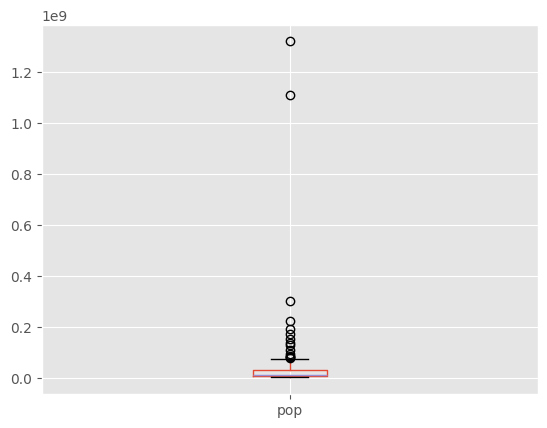

In [30]:
paises_last_record.boxplot(column=['pop'])

Este gráfico no resulta muy ilustrativo ya que los outliers lo distorcionan mucho. Como en esta librería no podemos quitarlos, vamos a probar graficando la esperanza de vida.

<Axes: >

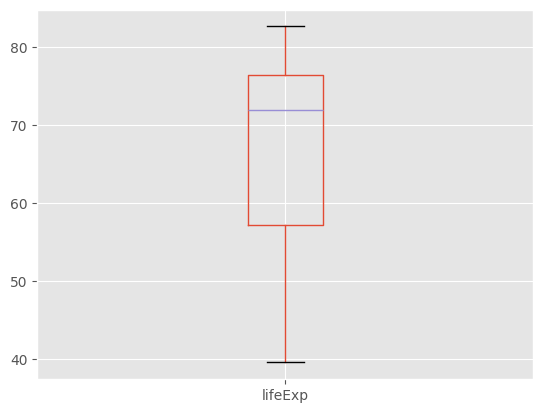

In [31]:
paises_last_record.boxplot(column=['lifeExp'])

<Axes: title={'center': 'lifeExp'}, xlabel='continent'>

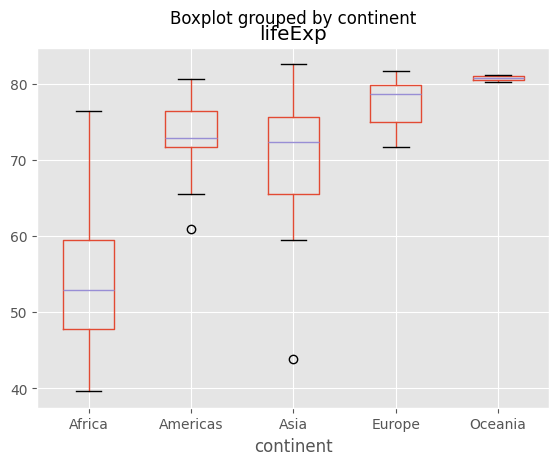

In [32]:
# Queremos ver las diferencias entre continentes
paises_last_record.boxplot(column=['lifeExp'], by='continent')

## 4.2 Seaborn
Veamos ahora las funciones de **[Seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)**

<Axes: ylabel='lifeExp'>

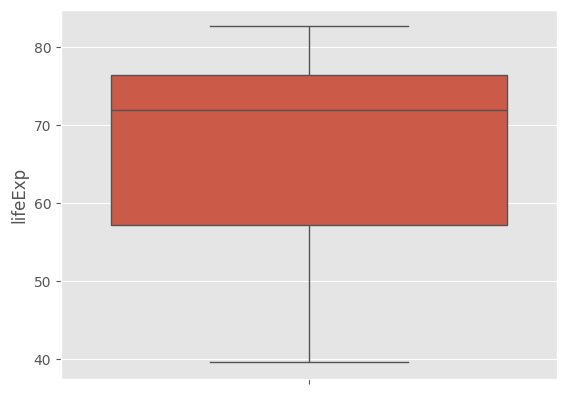

In [33]:
sns.boxplot(y='lifeExp', data=paises_last_record)

<Axes: xlabel='continent', ylabel='lifeExp'>

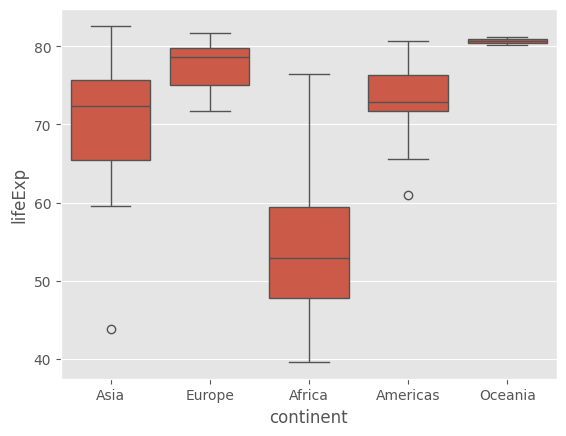

In [34]:
sns.boxplot(y='lifeExp',x='continent', data=paises_last_record)

<Axes: xlabel='continent', ylabel='lifeExp'>

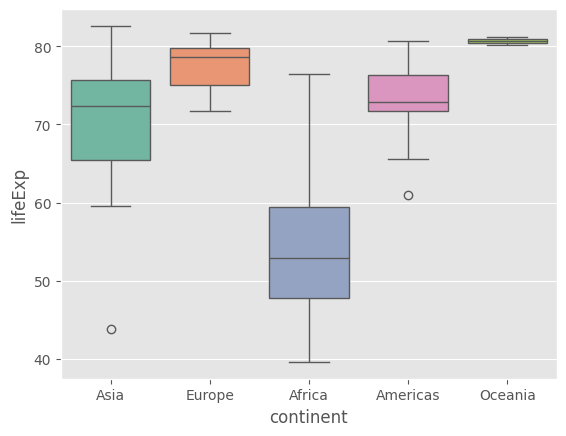

In [35]:
sns.boxplot(y='lifeExp',x='continent', data=paises_last_record, hue='continent',palette="Set2")

Vamos a trabajar ahora con los outliers de la variable de población.

<Axes: xlabel='continent', ylabel='pop'>

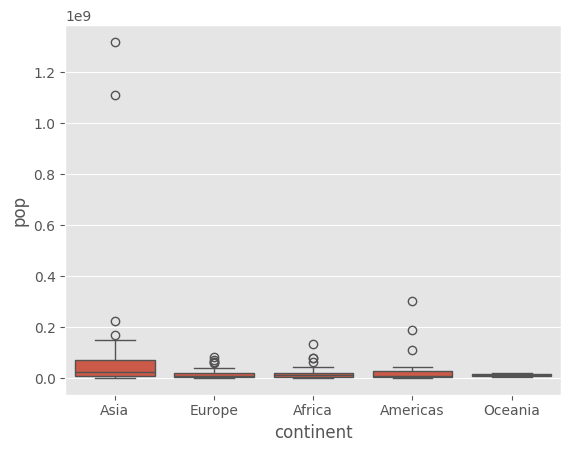

In [36]:
# con outliers
sns.boxplot(y='pop',x='continent', data=paises_last_record)

In [37]:
paises_last_record[(paises_last_record['pop'] > 160000000) & (paises_last_record['continent'] == 'Asia')]

,country,year,continent,lifeExp,pop,gdpPercap,continent_num
24,China,2007,Asia,72.961,1318683096,4959.114854,0
58,India,2007,Asia,64.698,1110396331,2452.210407,0
59,Indonesia,2007,Asia,70.650,223547000,3540.651564,0
97,Pakistan,2007,Asia,65.483,169270617,2605.947580,0


<Axes: xlabel='continent', ylabel='pop'>

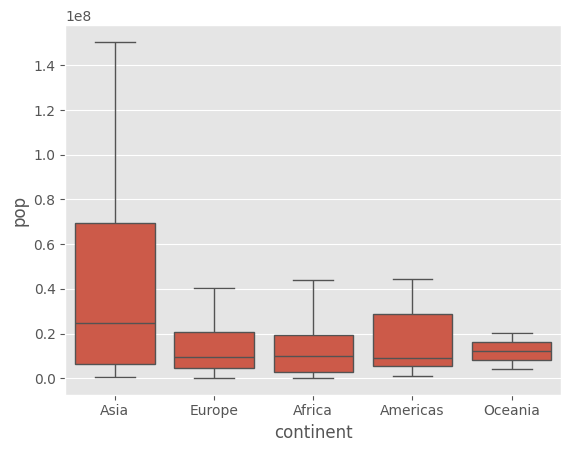

In [38]:
# sin outliers -> perdemos informacion
sns.boxplot(y='pop',x='continent', data=paises_last_record, showfliers=False)

<Axes: xlabel='continent', ylabel='pop'>

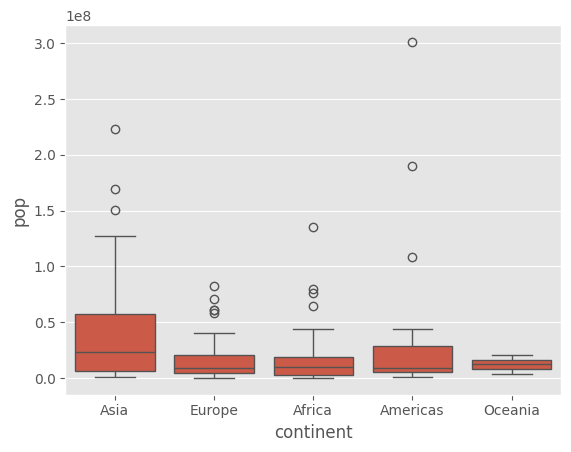

In [39]:
# con outliers, pero sin China ni India
sns.boxplot(y='pop',x='continent', data=paises_last_record[(paises_last_record.country != 'China') & (paises_last_record.country != 'India')])

<Axes: xlabel='continent', ylabel='pop'>

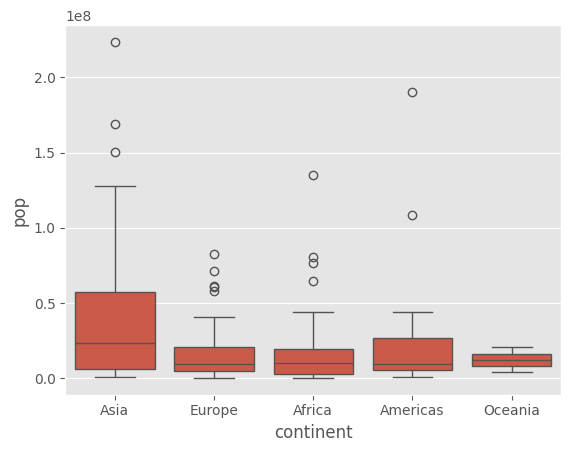

In [40]:
# con outliers, pero sin China ni India ni Estados Unidos
sns.boxplot(y='pop',x='continent', data=paises_last_record[(paises_last_record.country != 'China') & (paises_last_record.country != 'India') & (paises_last_record.country != 'United States')])

Otra librería que hace boxplots interactivos es **[Plotly Express](https://plotly.com/python/box-plots/)**

In [41]:
import plotly.express as px

fig = px.box(paises_last_record, y="gdpPercap")
fig.show()

In [42]:
fig = px.box(paises_last_record, y="gdpPercap", x="continent")
fig.show()

# 5. Heat Map




Vamos a analizar la correlacion entre las variables usando un mapa de calor. 

In [43]:
corr_matrix = paises_last_record[['gdpPercap', 'pop', 'lifeExp']].corr()
corr_matrix

,gdpPercap,pop,lifeExp
gdpPercap,1.000000,-0.055676,0.678662
pop,-0.055676,1.000000,0.047553
lifeExp,0.678662,0.047553,1.000000


<Axes: >

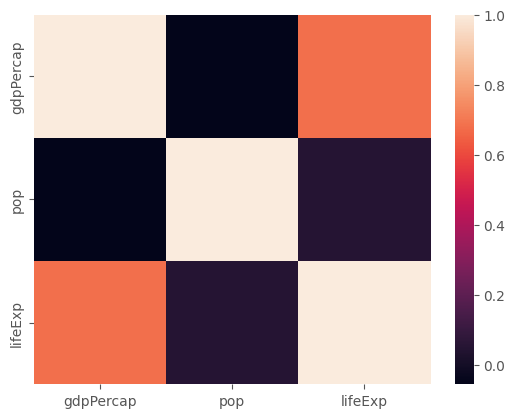

In [44]:
sns.heatmap(corr_matrix)

<Axes: >

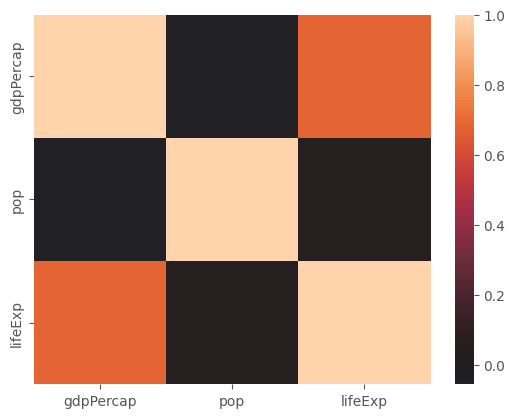

In [45]:
sns.heatmap(corr_matrix, center = 0)

<Axes: >

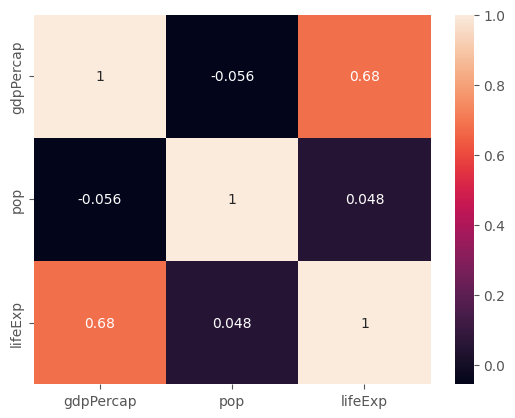

In [46]:
sns.heatmap(corr_matrix, annot=True)

Ahora vamos a usar otro dataset.

In [63]:
flights = sns.load_dataset("flights")
flights = flights.pivot(index = 'year', columns = 'month', values = "passengers")
flights.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: xlabel='month', ylabel='year'>

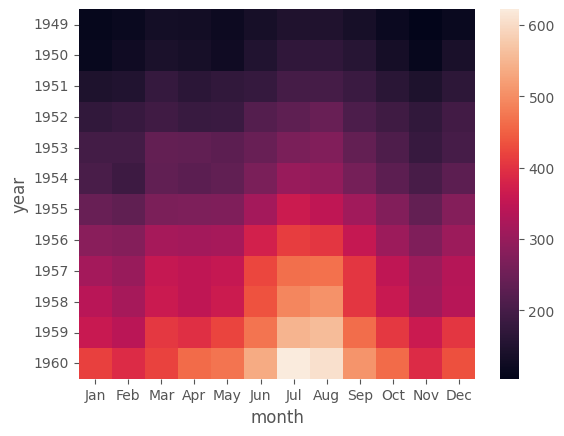

In [64]:
sns.heatmap(flights)

<Axes: xlabel='month', ylabel='year'>

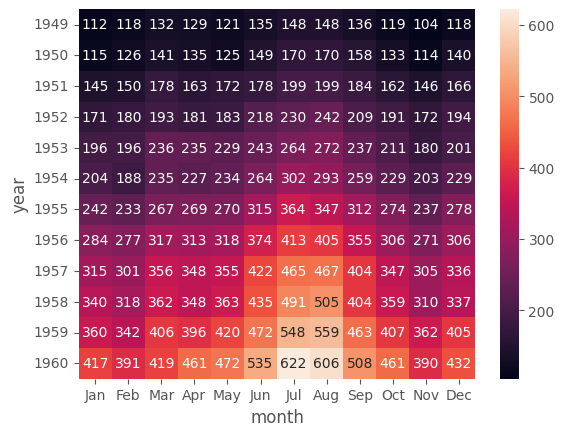

In [65]:
sns.heatmap(flights, annot=True, fmt="d")

<Axes: xlabel='month', ylabel='year'>

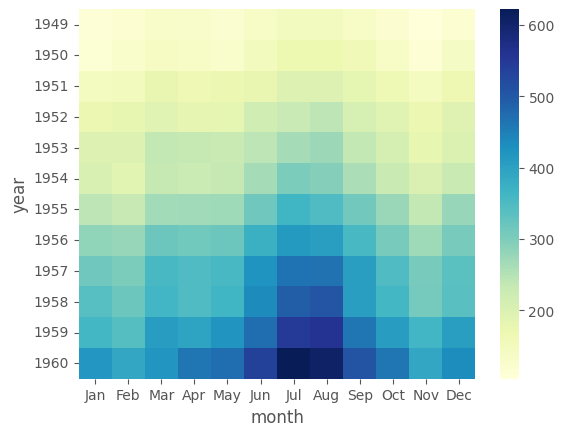

In [66]:
sns.heatmap(flights, cmap="YlGnBu")

<Axes: xlabel='month', ylabel='year'>

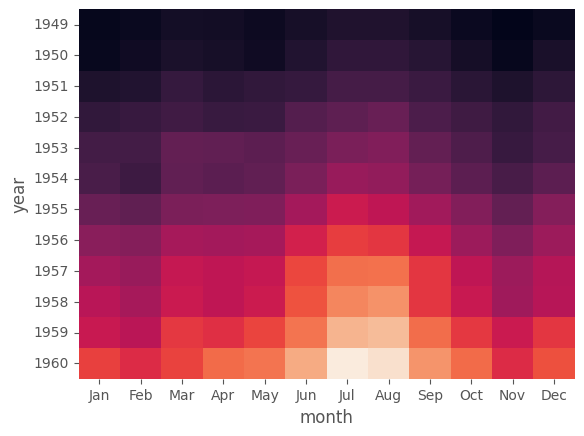

In [67]:
sns.heatmap(flights, cbar=False)

# 6. Gráficos de linea

Vamos a analizar la población de Uruguay y otros paises de la región. Usaremos la libreria de **[Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html)**

In [48]:
america_s = paises[(paises.country == 'Uruguay') | (paises.country == 'Argentina') | (paises.country == 'Chile') | (paises.country == 'Paraguay')]
america_s.head()

,country,continent,year,lifeExp,pop,gdpPercap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526


<Axes: xlabel='year', ylabel='pop'>

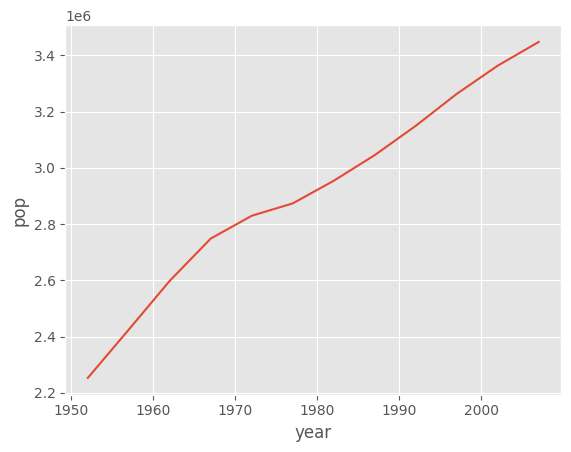

In [49]:
# Veamos la evolucion en Urugay
sns.lineplot(data=america_s[america_s.country == 'Uruguay'], x="year", y="pop")

<Axes: xlabel='year', ylabel='pop'>

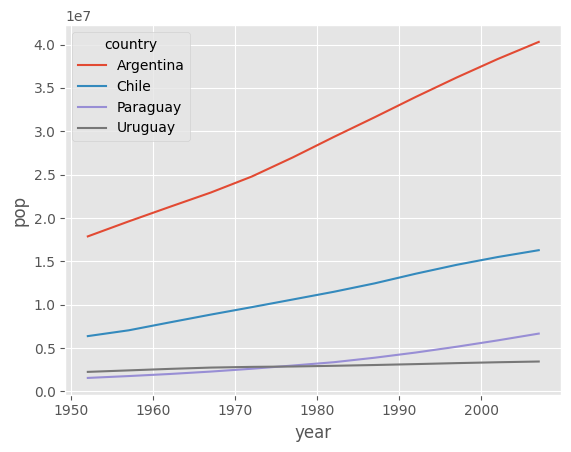

In [50]:
# Ahora en todos los paises
sns.lineplot(data=america_s, x="year", y="pop", hue='country')

<Axes: xlabel='year', ylabel='pop'>

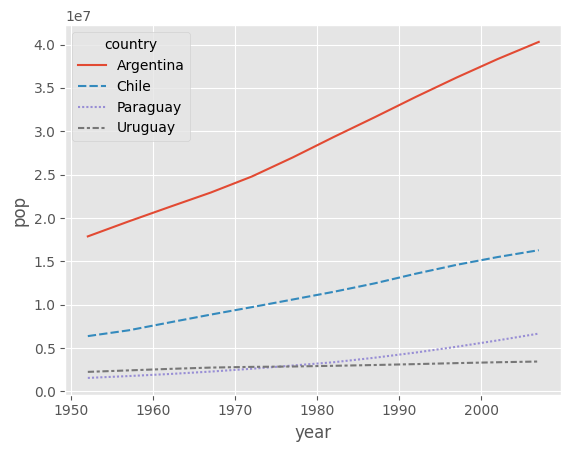

In [51]:
# Ahora en todos los paises
sns.lineplot(data=america_s, x="year", y="pop", hue='country', style='country')

<Axes: xlabel='year', ylabel='pop'>

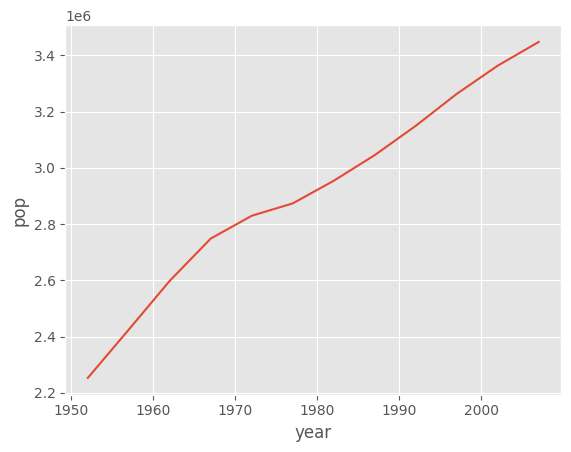

In [52]:
# Veamos la evolucion en Urugay
sns.lineplot(data=america_s[america_s.country == 'Uruguay'], x="year", y="pop", markers=True)